In [477]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [500]:
disease_type = 'respiratory'
year_range='2017-2020'
path_to_data = 'NYC_'+disease_type+'_'+year_range+'.csv'
df = pd.read_csv(path_to_data,infer_datetime_format=True,encoding='latin')
df.head()

,Data note 1,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Select Metric,Unnamed: 8
0,-Syndrome data are inherently non-specific and...,Respiratory,Borough,Bronx,Age Group,All age groups,12/25/2016,Count,405
1,-Syndrome data are inherently non-specific and...,Respiratory,Borough,Bronx,Age Group,All age groups,12/26/2016,Count,617
2,-Syndrome data are inherently non-specific and...,Respiratory,Borough,Bronx,Age Group,All age groups,12/27/2016,Count,605
3,-Syndrome data are inherently non-specific and...,Respiratory,Borough,Bronx,Age Group,All age groups,12/28/2016,Count,527
4,-Syndrome data are inherently non-specific and...,Respiratory,Borough,Bronx,Age Group,All age groups,12/29/2016,Count,512


In [501]:
df['Date'] = pd.to_datetime(df['Date '],infer_datetime_format=True)
#df = df[(df['Date']>='2020-01-01')]
df['Count'] = df['Unnamed: 8']
df = df.drop(["Unnamed: 8","Select Metric"],axis=1)
df["Count"] = pd.to_numeric(df['Count'].str.replace(",",""))

In [502]:
def next_weekday(d, weekday):
    days_ahead = weekday - d.weekday()
    if days_ahead < 0: # Target day already happened this week
        days_ahead += 7
    return d + datetime.timedelta(days_ahead)

d = datetime.date(2011, 7, 2)
next_monday = next_weekday(d, 0) # 0 = Monday, 1=Tuesday, 2=Wednesday...
print(next_monday)

2011-07-04


In [503]:
df['Dim2Value'].unique()

array(['All age groups', 'Ages 0-4 years', 'Ages 5-17 years',
       'Ages 18-64 years', 'Ages 65+ years'], dtype=object)

In [504]:
df[(df['Dim2Value']==agegroup)]

,Data note 1,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Date,Count


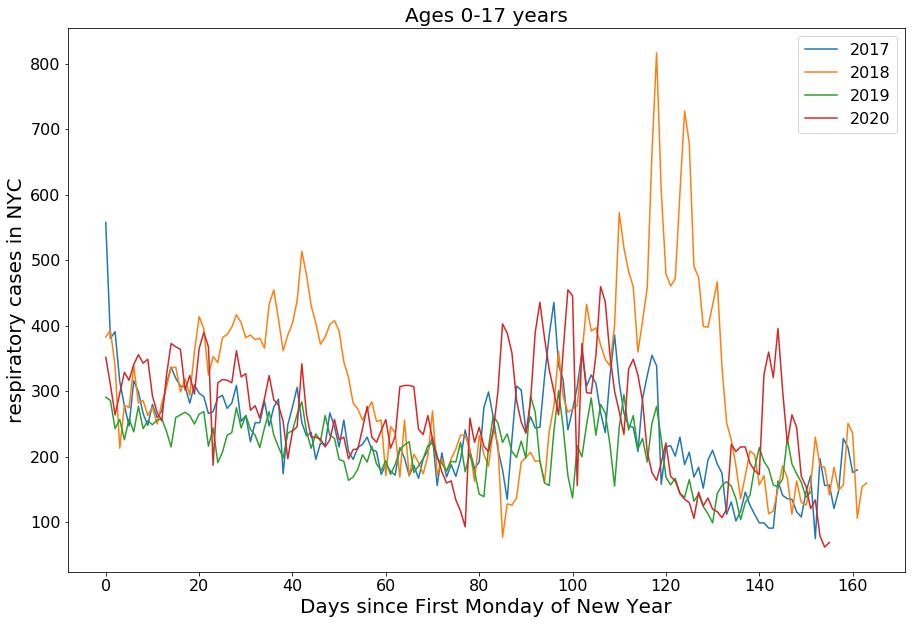

In [508]:
## Plot age groups
#end date is march 19
#also plotting weekends
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
slices = []
agegroup = 'Ages 0-17 years'
## only plotting 18-64

for year in [2017,2018,2019,2020]:
    d = datetime.date(year, 1, 1)
    end_date = pd.Timestamp(datetime.date(year,df['Date'].max().month,df['Date'].max().day))
    next_monday = pd.Timestamp(next_weekday(d, 0))
    this_slice = df[(df['Date']>=next_monday)&(df['Date']<=end_date)]
    if agegroup=='Ages 0-17 years':
        this_slice = this_slice[(this_slice['Dim2Value']=='Ages 0-4 years')|(this_slice['Dim2Value']=='Ages 5-17 years')]
        this_slice = this_slice[(this_slice['Dim1Value']=='Citywide')]
    else:
        this_slice = this_slice[(this_slice['Dim2Value']==agegroup)&(this_slice['Dim1Value']=='Citywide')]
    this_slice = this_slice.reset_index()
    slices.append(this_slice)
    #print(this_slice['Date'].dt.strftime('%m-%d'))
    x = range(len(this_slice))
    y = this_slice['Count'].values
    ax.plot(x,y,label=year)
    next_slice = this_slice[(this_slice['Date'].dt.weekday==5)|(this_slice['Date'].dt.weekday==6)]
    #ax.scatter(np.array(x)[next_slice.index.values],next_slice['Count'].values,label=str(year) + ' weekend')

ax.legend(fontsize=16)
ax.set_xlabel("Days since First Monday of New Year",fontsize=20)
ax.set_ylabel(disease_type +" cases in NYC",fontsize=20)
ax.set_title(agegroup,fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)